<a href="https://colab.research.google.com/github/aditya8075/Bike-Sharing-Demand-Prediction---Supervised-machine-Learning-Regression/blob/main/Bike_Sharing_Demand_Prediction_Supervised_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [21]:
#importing pakages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import datetime as dt
import datetime as datetime

### Loading Data

In [22]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#reading_our_dataset
bd_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')

In [24]:
#head of dataset
bd_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [25]:
#tail of dataset
bd_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [26]:
# finding how many records and features present in dataset
bd_df.shape

(8760, 14)

In [27]:
#number of fetures and lebels exist in our dataset
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [28]:
# Describe method is used for calculating some statistical data like Mean, percentile,standard of numerical value. It analyse both numeric and object series and also dataframe column set of mixed data type.
bd_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [29]:
# Info method usual gives imformation of Dataframes.
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [30]:
# finding how many null value are present in each column
bd_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Conclusison - There are no null values preset in Dataset

In [31]:
# Finding how many duplicate rows in our dataset
bd_df.duplicated().sum()

0

Conclusion - There are No duplicates present in Dataset

## *Correcting datatypes*

In [34]:
#Converting the datatype of Date column to datatime
bd_df['Date'] = pd.to_datetime(bd_df['Date'], format='%d/%m/%Y')

In [35]:
#Extracting Month,Weekday and Year from the date column
bd_df['Month']=bd_df['Date'].dt.month
bd_df['Days_of_week']=bd_df['Date'].dt.day_name()
bd_df['Year']=bd_df['Date'].dt.year
bd_df['Day']=bd_df['Date'].dt.day

In [36]:
#Converting the datatype of Date column to datatime
bd_df['Date'] = pd.to_datetime(bd_df['Date'], format='%d/%m/%Y')

#*Creating new columns*

In [37]:
#The number of unique values in Date column
bd_df['Date'].nunique()

365

The dataset contains records of rented bikes per hour for a period of 365 days

In [38]:
#The number of unique values in Year column
bd_df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

Most of the records are from the year 2018

In [39]:
#Finding the date of first and last entry in the dataset
print(f'The dataset contains observations from ',min(bd_df['Date']).date(),'to',max(bd_df['Date']).date())

The dataset contains observations from  2017-12-01 to 2018-11-30


In [40]:
#Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bd_df['Weekend']=bd_df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [41]:
#Displaying the unique values in the categorical columns
categorical_columns=['Seasons','Holiday', 'Functioning Day','Days_of_week','Weekend']

for col in categorical_columns:
  print(f'The unique values in the column {col} are {bd_df[col].unique()}')

The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


## Exploratory Data Analysis

# Univariate Analysis

Let's see how some of the important numerical independent features are distibuted in our data.

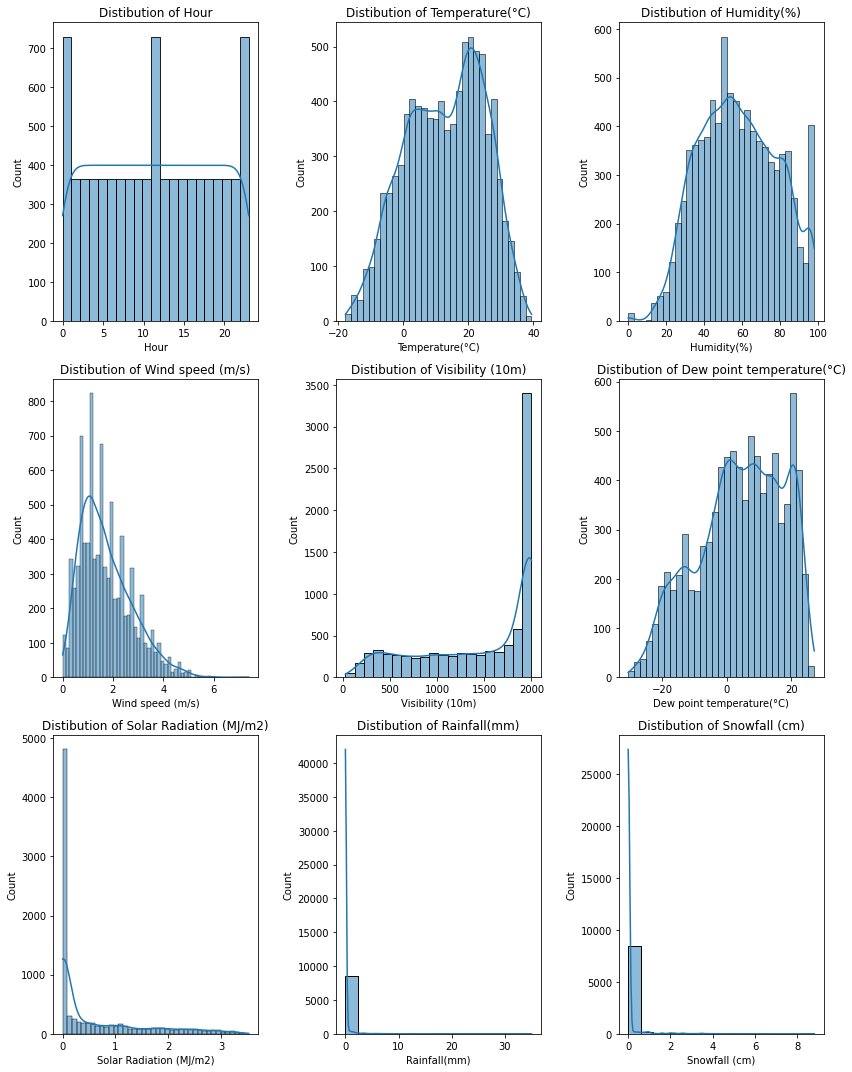

In [42]:
fig = plt.figure(figsize=(12,15))
c=1
lis=['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for i in lis:
  plt.subplot(3,3, c)
  sns.histplot(bd_df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()

Distribution of Temperature,Humidity,Dew point temperature are almost normal.

Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed

Visibility is negatively skewed

# How is the dependent variable Rented Bike Count distributed?

Text(0.5, 1.0, 'Distibution of Rented Bike Count')

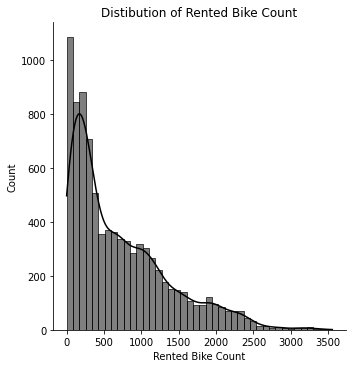

In [43]:
sns.displot(bd_df['Rented Bike Count'],kde=True,color='black')
plt.title('Distibution of Rented Bike Count')

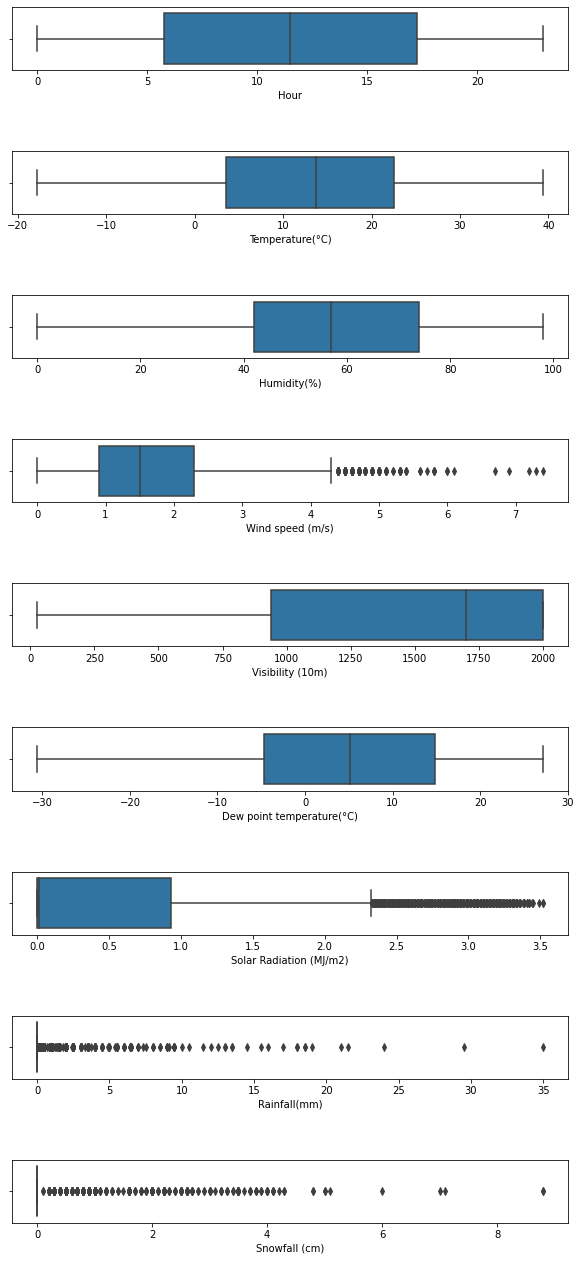

In [44]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in lis :
    plt.subplot(13,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=bd_df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The outlier values are not extreme,nor unusual.So,we retain these values in our dataset.

In [45]:
#The number of records belonging to each category
for col in categorical_columns:
 print('Column :',col) 
 print(bd_df[col].value_counts(),'\n')

Column : Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Column : Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Column : Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Column : Days_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Days_of_week, dtype: int64 

Column : Weekend
N    6264
Y    2496
Name: Weekend, dtype: int64 



# Basic Conclusions from Univariate Analysis

Number of records are mostly similar throughout the seasons(need to dig more for better understanding).

More number of records on non-holiday(well working days😂) days & Functioning days of the rental service.

Bike rentals are fewers on Weekends

Not much info from hour at the moment.

The temperature is mostly >0, for now lets consider Seoul on the warmer side.

Humidity is also moderate but still on warmer side.

Wind speed is not that extreme.

Most of the rainfall is <4 mm.

Snowfall is mostly 0-1 cm and not that extreme in most cases.

# Bivariate Analysis

## Correlation heatmap

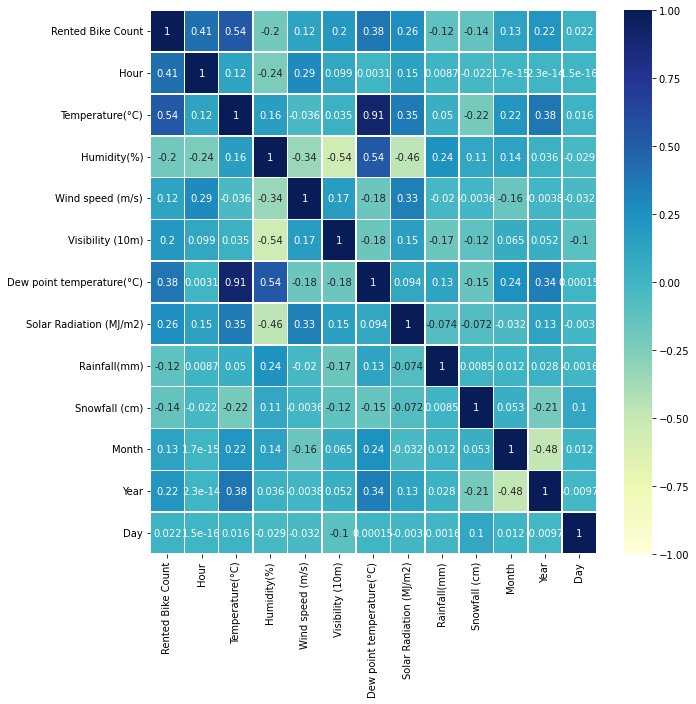

In [46]:
#Correlation heatmap of numerical features in the dataset
plt.figure(figsize = (10,10))
sns.heatmap(bd_df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'YlGnBu')

Dew point temperature is strongly correlated with temperature.

Temperature,Hour shares a stronger correlation with Rented Bike count.

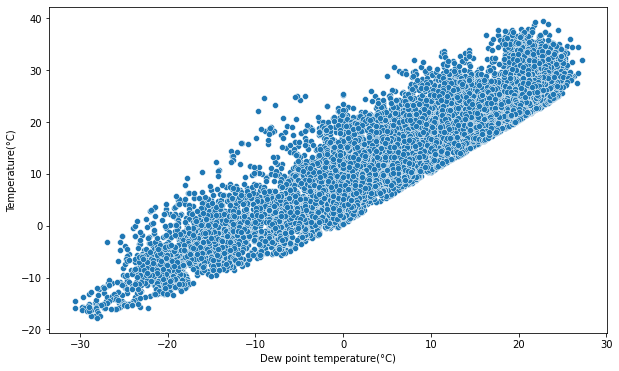

In [47]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=bd_df, y='Temperature(°C)', x='Dew point temperature(°C)')

## Were rental services offered on non-functional days?

In [48]:

len(bd_df[bd_df['Functioning Day']=='No'])

295

It is highly unlikely that services will be provided on non-functional days.But since there were few observations (295) recorded on those days,let's check if there were any exceptional cases.

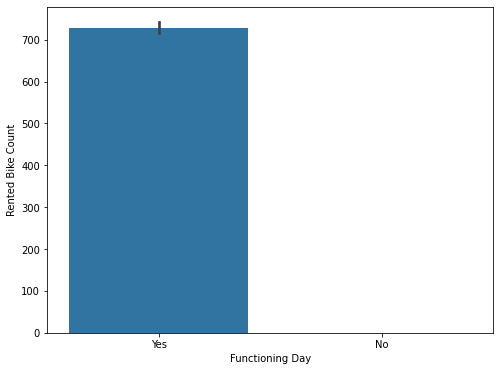

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bd_df)

The rental service were functional on most days during the period from Dec 2017 to Nov 2018(only 13 non-functional days)

Although,we've observed few records on Non-Functioning Day,rental services were not offered on those days(no exceptions)

## Which are the days on which the rental facility was unavailable?

In [50]:
non_functioning_days =bd_df.loc[bd_df['Functioning Day']=='No']

#Holiday on which the rental service was unavailable
non_functioning_days.loc[non_functioning_days['Holiday']=='Holiday']['Date'].unique()

array(['2018-10-09T00:00:00.000000000'], dtype='datetime64[ns]')

The holiday on which the rental service was not functioning is Hangeul day.It is a national Korean commemorative day marking the invention and the proclamation of Hangul , the alphabet of the Korean language

In [51]:
non_functioning_days.loc[non_functioning_days['Holiday']=='No Holiday']['Date'].value_counts().to_frame(name = 'Hours_of_non_operation').reset_index()

,index,Hours_of_non_operation
0,2018-04-11,24
1,2018-05-10,24
2,2018-09-18,24
3,2018-09-19,24
4,2018-09-28,24
5,2018-09-30,24
6,2018-10-02,24
7,2018-10-04,24
8,2018-11-03,24
9,2018-11-06,24


The services were not for available for 1 day in the month of April,1 day in May,4 days in September,3 days each in October and November.

## What is the likelihood of people renting bikes on holidays and non-holidays?

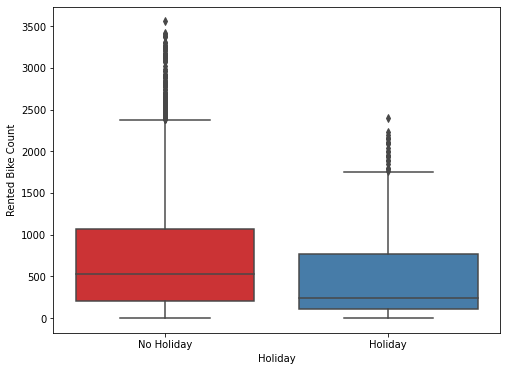

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bd_df,palette='Set1')

The demand for rented bikes is higher on non-Holidays.

# What is the count of rented bikes during different seasons over the entire period of observation?

In [53]:
#Finding the total number of bikes rented in each season
season_df=bd_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()['Rented Bike Count'].to_frame(name = 'season_count').reset_index()

In [54]:
#Finding the total number of bikes rented in each month
month_df=(bd_df.groupby(['Seasons','Month'])['Rented Bike Count'].sum()).to_frame(name = 'month_count').reset_index()

[None]

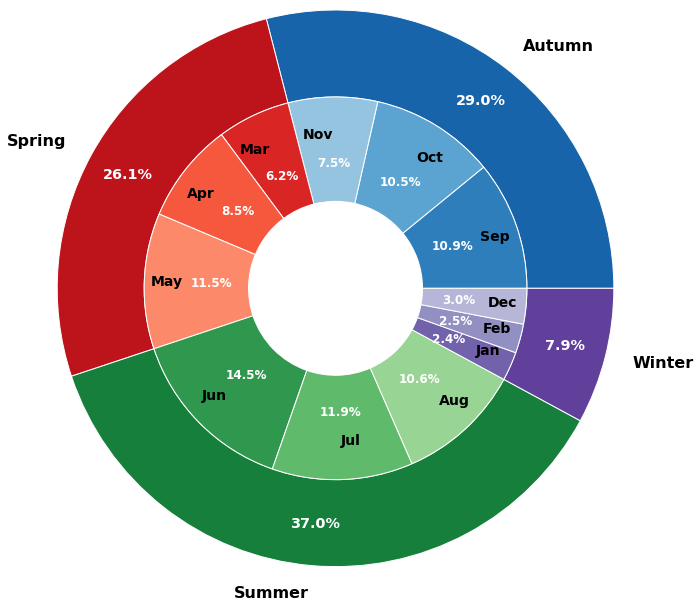

In [55]:
import calendar
d = dict(enumerate(calendar.month_abbr))
#Replacing the numerical value of Month with the name of the Month 
subgroup_names = month_df['Month'].map(d)

fig, ax = plt.subplots()
size=1
group_names=['Autumn', 'Spring', 'Summer','Winter']
group_size=season_df['season_count']

subgroup_size=month_df['month_count']
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
outer_colors = [a(.8), b(.8),c(.8),d(.8)]
inner_colors = [*a(np.linspace(.7, .4, 3)),*b(np.linspace(.7, .4, 3)),*c(np.linspace(.7, .4, 3)),*d(np.linspace(.7, .4, 3))]

#Creating nested pie chart
patches, texts,pcts=ax.pie(group_size, radius=3.2, colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'),labels=group_names,autopct='%1.1f%%', textprops={'fontsize':16,'size': 'x-large'},labeldistance=1.1,pctdistance=0.85)
plt.setp(pcts, color='white',fontweight='bold')
plt.setp(texts, fontweight=600)

patches1, texts1,pcts1=ax.pie(subgroup_size, radius=3.2-size, colors=inner_colors,labels=subgroup_names,
       wedgeprops=dict(width=1.2, edgecolor='w'),autopct='%1.1f%%', textprops={'fontsize': 14},labeldistance=0.8,pctdistance=0.65)
plt.setp(pcts1, color='w', fontweight='bold',fontsize=12)
plt.setp(texts1, fontweight=600)

ax.set(aspect="equal")

The demand for rental bikes is lowest during Winters(Dec-Feb),highest during Summers(June-August)

#What is the demand for rental bikes during different days of the week?

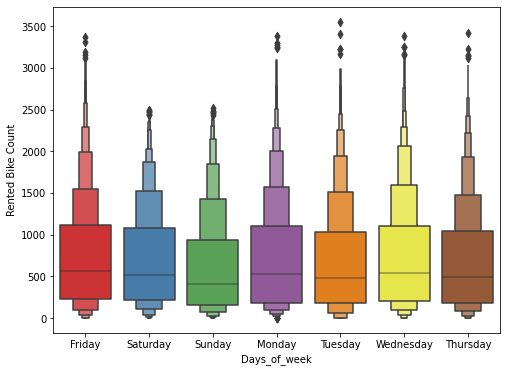

In [56]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Days_of_week',y='Rented Bike Count',data=bd_df,palette='Set1')

Least demand on Sunday,Slightly higher demand on Friday
More demand on weekdays than weekends.

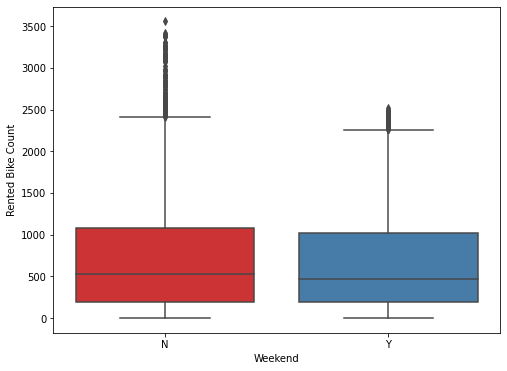

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Weekend',y='Rented Bike Count',data=bd_df,palette='Set1')

In [58]:
bd_df.groupby(['Weekend'])['Rented Bike Count'].mean()

Weekend
N    719.448914
Y    667.342147
Name: Rented Bike Count, dtype: float64

The average demand for rental bikes is lower on Weekends(Sat-Sun) as compared to Weekdays(Mon-Fri).


## What is the demand for rental bikes during different hours of the day?

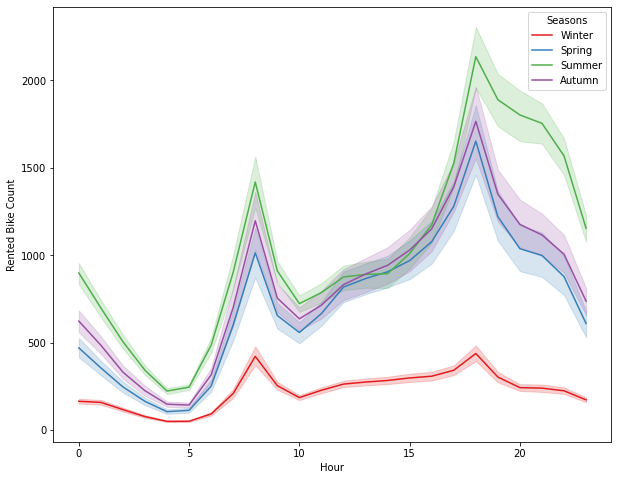

In [59]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Seasons',lw=1.5)

The demand for rental bikes peaks at 8 (8:00 am) and 18 (6:00 PM ).

This peak in demand coincides with opening and closing hours of various institutions and offices.

The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM

The demand for bikes is least during the early hours (1:00 AM to 6:00 AM)

Regardless,of the seasons,this has been the general trend noticed.

## What is the variation of Rented bikes count over the entire period of observation based on various factors?

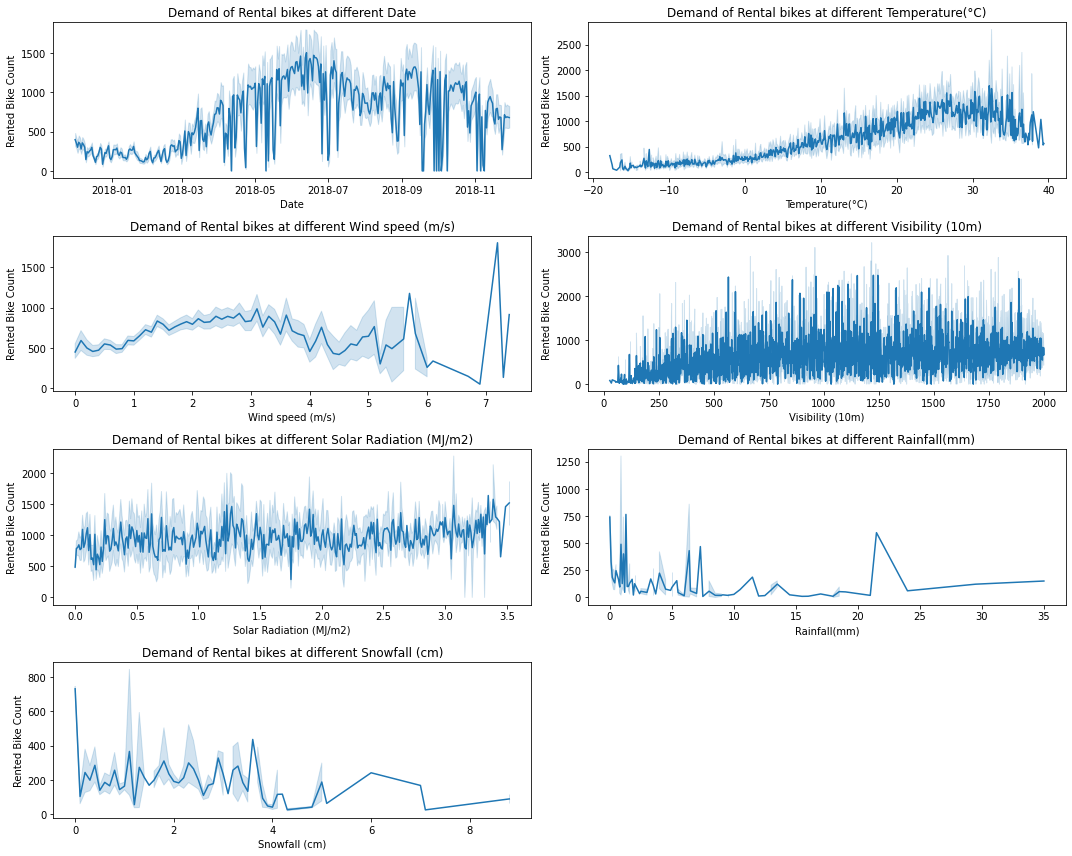

In [60]:
fig = plt.figure(figsize=(15,12))
c=1
cont = ['Date','Temperature(°C)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for i in cont:
  plt.subplot(4,2,c)
  sns.lineplot(x=i,y='Rented Bike Count',data=bd_df,palette='inferno')
  plt.title('Demand of Rental bikes at different {}'.format(i))
  c = c + 1
plt.tight_layout()

Temperature vs Bike count plot : The demand is higher during warmer temperatures (25°C-30°C)

Windspeed vs Bike count plot : The demand for rental bikes is relatively uniform over all windspeeds upto 5 m/s .Beyond that speed,we observe a higher demand for bikes.

Visibility vs Bike count plot : The count of bikes rented is few on times when the visibility is extremely low,less than 1000m.

Solar radiation vs Bike count plot:There is an overall increase in the demand with increase in Solar radiation.

Rainfall vs Bike count plot : The peak between 20 mm and 25 mm seems out of place,on refering to the dataset we find that such observations are recorded during Summer Season.However,people still continue to opt for rental bikes,since they have to go to work (No Holiday).

Snowfall vs Bike count plot : The demand for bikes is comparatively lower when the snowfall received is 4 cm and above.

In [61]:
#1.Rainfall
bd_df[(bd_df['Rainfall(mm)'] >=20) & (bd_df['Rainfall(mm)'] <=25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Year,Day,Weekend
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,Thursday,2018,28,N
5132,2018-07-02,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,7,Monday,2018,2,N
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,Wednesday,2018,29,N


These are working days

In [62]:
bd_df[(bd_df['Snowfall (cm)'] >=5) & (bd_df['Snowfall (cm)'] <=8)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Year,Day,Weekend
420,2017-12-18,62,12,-1.8,83,1.2,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes,12,Monday,2017,18,N
421,2017-12-18,76,13,-0.9,84,1.2,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,Yes,12,Monday,2017,18,N
8601,2018-11-24,24,9,0.3,97,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8604,2018-11-24,167,12,2.5,84,1.9,1538,0.0,0.40,1.8,7.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8605,2018-11-24,241,13,2.6,83,1.9,1774,0.0,0.84,0.0,6.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8606,2018-11-24,298,14,3.0,82,1.7,1589,0.2,0.55,0.0,5.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y


These are Working days

## What are the factors which influence the demand for rental bikes during a day?

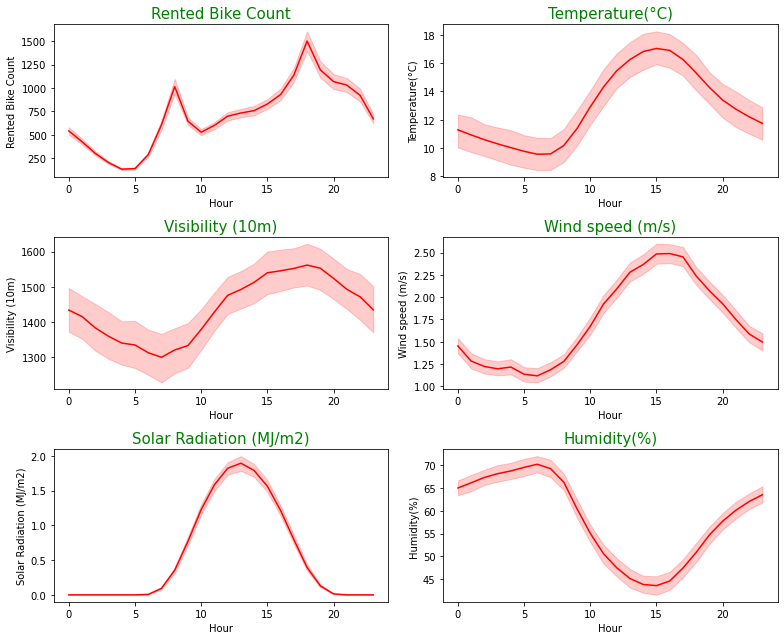

In [63]:
fig = plt.figure(figsize=(11,9))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

Temperature, visibility, windspeed, and humidity appear to be positively associated to the hourly demand for rental bikes.

The rented bike counts are highest during the hours from 7:00 AM to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.

## What are the factors which influence the demand for rental bikes during different months?

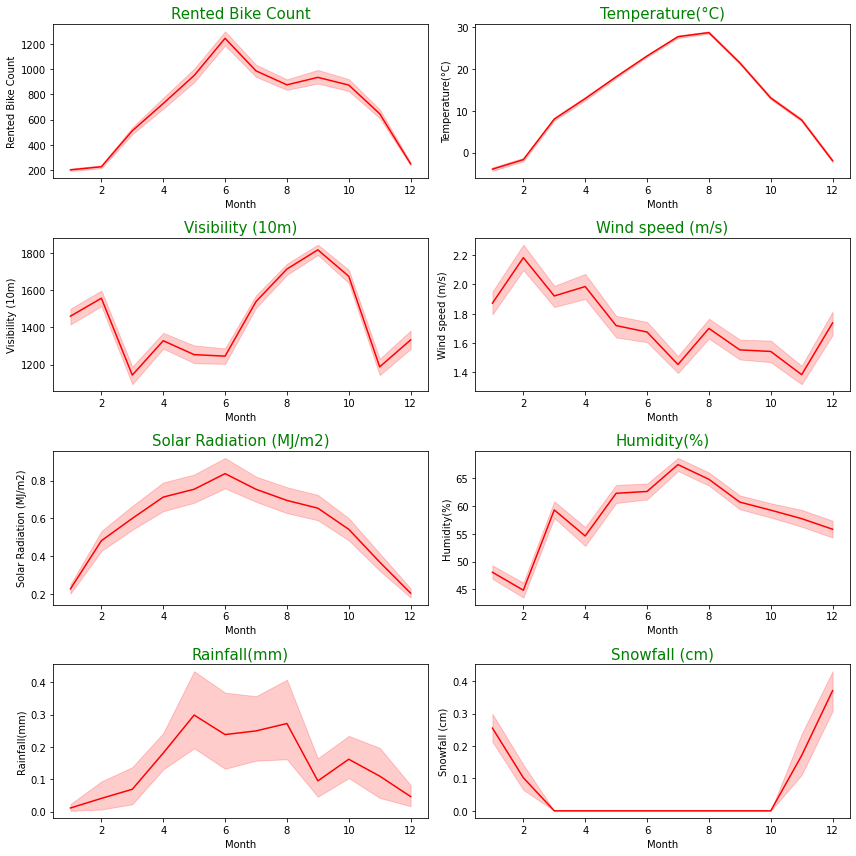

In [64]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()

The monthly count of rented bikes is positively associated with Temperature.

Snowfall movement coincides with season, with heavy snowfall from December to February throughout the winter season. 
There's a decline in count of rented bikes during these months.

Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.

## What are the factors which influence the demand for rental bikes during various seasons of the year?

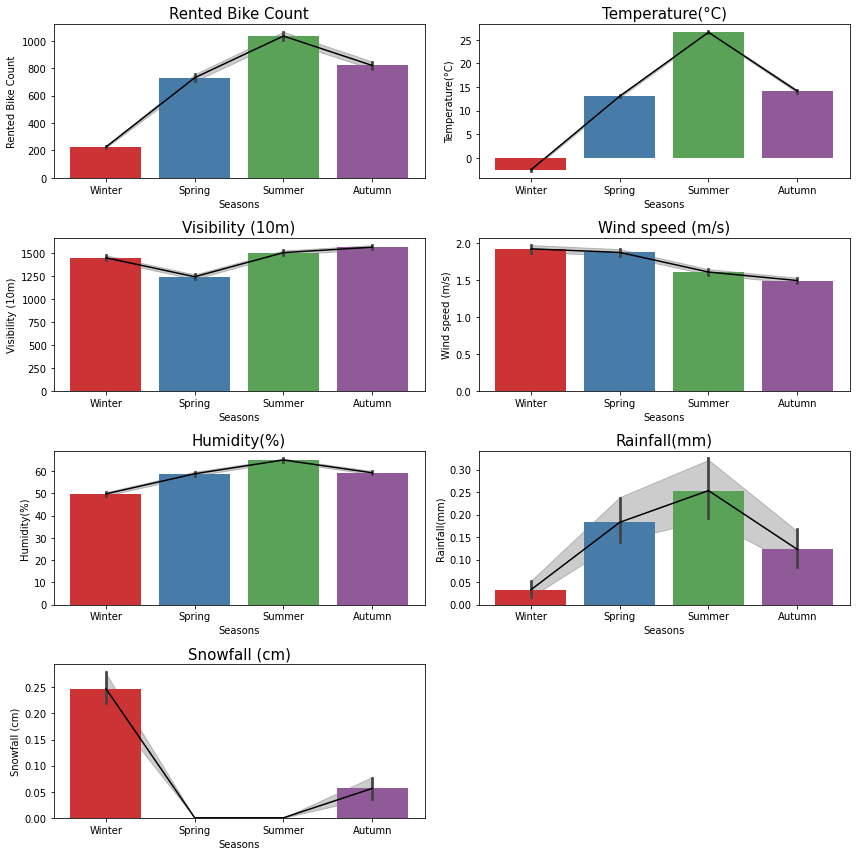

In [65]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bd_df, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bd_df, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

It is evident that the seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received.


Therefore,the demand is highest during Summer season and least during winters

Basic Conclusions from Bivariate Analysis

Temperature and Hour have a strong correlation with the count of rented bikes.

Dew point temperature is highly positively correlated to the Temperature.

During the period from Dec 2017 to Nov 2018,bike rental facilities were available on most days.The service was unavailable only for 13 days.

The demand for rental bikes is higher on Regular days(Non-Holidays) .

There is more demand for rental bikes on Weekdays than on Weekends.

The peak demands for rental bikes occur on the opening (8-9 AM) and closing times (6-7pm) of offices and institutions.

There is a significant drop in the number of rented bikes during Winters(Dec-Feb) because it's freezing cold!
The demand for bikes increases during warmer temperatures,which is why there's maximum count of rented bikes during the Summer season.


## Feature Engineering

In [66]:
#Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''

  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [67]:
#Displaying the columns in the dataframe
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Year', 'Day',
       'Weekend'],
      dtype='object')

In [68]:
#Checking the VIF value of certain columns in bd_df
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


In [69]:
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


The VIF of the features,now lie within the acceptable range.

In [70]:
#Dropping 'Dew point temperature(°C)','Year' to reduce the VIF
bd_df.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)

In [71]:
#Creating a copy of the main dataframe 'bd_df'
df=bd_df.copy()

In [72]:
#Creating dummies for the Categorical columns
df = pd.get_dummies(bd_df, columns = ['Seasons','Holiday','Weekend','Functioning Day'],drop_first=True)
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Days_of_week,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1


In [73]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Days_of_week', 'Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Weekend_Y', 'Functioning Day_Yes'],
      dtype='object')

In [74]:
#Dropping the columns Date and Days_of_week
df.drop(['Days_of_week','Date'],axis=1,inplace=True)

In [75]:
#Displaying the columns present in the dataframe 'df'
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Weekend_Y',
       'Functioning Day_Yes'],
      dtype='object')


### Implementation of Regression models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [77]:
#Defining independent and dependent variables

y = df['Rented Bike Count']
X = df.drop('Rented Bike Count',axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
print(f'The shape of X : {X.shape}\n The shape of X_train : {X_train.shape}\n The shape of X_test : {X_test.shape}')

The shape of X : (8760, 16)
 The shape of X_train : (6132, 16)
 The shape of X_test : (2628, 16)


In [80]:
#Creating functions to calculate the Evaluation metrics for the regression models

def evaluate_model(name,X_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating 
  the perfomance of Regression models
  '''
  list_=[]
  #calculating mean absolute error  
  MAE =  mean_absolute_error(y_true,y_pred)
  print(f'MAE : {MAE}')
    
  #finding mean_squared_error
  MSE  = mean_squared_error(y_true,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
 
  #finding the r2 score
  r2 = r2_score(y_true,y_pred)
  print("R2 :" ,r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_true,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  list_.extend([name,MAE,MSE,RMSE,r2,adj_r2])
  return(list_)

In [81]:
#Creating a  list which would store lists of different models and their performance metrics
list_of_models=[]

## 1. Linear Regression

In [82]:
#Scaling the features 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [83]:
#Importing the Linear Regression model 
from sklearn.linear_model import LinearRegression

In [84]:
#Fitting the data to Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
#predicting the values of y from X_test
y_pred= regressor.predict(X_test)

In [86]:
#Evaluating the model
list_of_models.append(evaluate_model('Multiple Linear Regression',X_test,y_test,y_pred))

MAE : 327.66578987433144
MSE : 188770.69253621172
RMSE : 434.47749370503846
R2 : 0.5393478523845607
Adjusted R2 :  0.5365250127208889


## 2. Lasso Regression

Lasso Regression with Hyper-parameter Tuning

In [87]:
#importing the classes required for Cross Validation 
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gsv

In [88]:
#importing the linear_model class from sklearn library
from sklearn import linear_model

#Creating a Lasso Linear model object
ls_model = linear_model.Lasso()

In [89]:
#Creating the parameter grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005,)
grid['max_iter'] = [25,50,100,500,1000]

In [90]:
#performing GridSearch CV
ls_model=gsv(estimator=ls_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [91]:
#Training the model
ls_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.460e+08, tolerance: 2.059e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
     

In [92]:
#displaying the best estimators and score
print(ls_model.best_estimator_,'The best score is ',ls_model.best_score_)

Lasso(alpha=0.23500000000000001, max_iter=25) The best score is  0.5559063428609835


In [93]:
#Fitting the data to optimal Lasso model
best_lasso = ls_model.best_estimator_
best_lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+07, tolerance: 2.567e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.23500000000000001, max_iter=25)

In [94]:
#Prediciting the values for y from X_test using the best parameters
y_pred=best_lasso.predict(X_test)

In [95]:
#Evaluating the model
list_of_models.append(evaluate_model('Lasso Regression(Tuned)',X_test,y_test,y_pred))

MAE : 327.5787900127513
MSE : 188737.802790525
RMSE : 434.4396422870788
R2 : 0.5394281123644419
Adjusted R2 :  0.5366057645275331


## 3. Ridge Regression

In [96]:
#importing Ridge from linear_model class of sklearn library
from sklearn.linear_model import Ridge

In [97]:
#Creating an instance of Ridge regression
ridge=Ridge()

In [98]:
#Training the model
ridge.fit(X_train,y_train)

Ridge()

In [99]:
#predicting the values of y from the test data
y_pred=ridge.predict(X_test)

In [100]:
ridge.score(X_train,y_train)

0.558631773704932

In [101]:
#Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression (default)',X_test,y_test,y_pred))

MAE : 327.65717168634285
MSE : 188767.25013472006
RMSE : 434.473532145193
R2 : 0.5393562527862268
Adjusted R2 :  0.5365334645995472


Ridge Regression with Hyper-Parameter Tuning

In [102]:
#Creating an object of linear model with Ridge regularization
Ridge_model = linear_model.Ridge()

In [103]:
#Creating the parameter grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005)
grid['max_iter'] = [25,50,100,500,1000]

In [104]:
#Perfoming cross-validation to find the best model
Ridge_model=gsv(estimator=Ridge_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')
Ridge_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
     

In [105]:
print(Ridge_model.best_estimator_,Ridge_model.best_score_)

Ridge(alpha=0.995, max_iter=25) 0.5558996785868935


In [106]:
#Fitting the train data to the Ridge model with best parameters
best_ridge = Ridge_model.best_estimator_
best_ridge.fit(X_train,y_train)

Ridge(alpha=0.995, max_iter=25)

In [107]:
y_pred = best_ridge.predict(X_test)

In [108]:
#Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression(Tuned)',X_test,y_test,y_pred))

MAE : 327.6572143132237
MSE : 188767.2672383388
RMSE : 434.4735518283464
R2 : 0.5393562110487166
Adjusted R2 :  0.5365334226062728


## 4. ElasticNet Regression

In [109]:

#Importing Elastic Net
from sklearn.linear_model import ElasticNet

In [110]:
#Creating an instance of ElasticNet model
elasticnet = ElasticNet()

In [111]:
#Fitting the model to train data and finding its score
elasticnet.fit(X_train,y_train)
elasticnet.score(X_train, y_train)

0.5044829035117837

In [112]:
#Predicting the values of y from test data
y_pred = elasticnet.predict(X_test)

In [113]:
#Evaluating the model
list_of_models.append(evaluate_model('Elastic Net Regression(default)',X_test,y_test,y_pred))

MAE : 332.6891140383305
MSE : 206068.92602930366
RMSE : 453.9481534595153
R2 : 0.49713542893319496
Adjusted R2 :  0.49405391490137995


Elastic Net regression with Hyperparameter tuning

In [114]:
#Creating an instance of ElasticNet model 
elastic = ElasticNet()

#Creating the parameter grid
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

In [115]:
#Performing GridSearch Cross Validation to find the best parameters

elastic_regressor = gsv(elastic, parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.434e+08, tolerance: 2.059e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.487e+08, tolerance: 2.029e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [116]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -185643.02046729444


In [117]:
best_elasticnet=elastic_regressor.best_estimator_
best_elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [118]:
#predicting the values of y from best model
y_pred_elastic = best_elasticnet.predict(X_test)

In [119]:
#Evaluating the model
list_of_models.append(evaluate_model('Elastic Net Regression(Tuned)',X_test,y_test,y_pred_elastic))

MAE : 327.5596252492518
MSE : 188730.34572316232
RMSE : 434.4310598048467
R2 : 0.5394463096494619
Adjusted R2 :  0.536624073324066


5. Polynomial Regression

In [ ]:
#importing the packages required for preprocessing,creating pipeline,cross-validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
def PolynomialRegression(degree=1, **kwargs):#initializing the degree as 1,however the degree will change while performing GridSearch cross-validation
  '''
  This function transforms the independent features(X_train) to a polynomial of the degree given in the parameters 
  and performs Linear regression using the  y_train(not-transformed) and the transformed X_train.
  '''
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
#Creating a parameter grid
parameters = {'polynomialfeatures__degree': [2,3,4,5]}

#Creating a PolynomialRegression object
poly_regressor = PolynomialRegression()

#Perfoming GridSearch Cross-validation to find the optimal parameters
poly_grid = GridSearchCV(poly_regressor, param_grid=parameters,cv=3, scoring='neg_mean_squared_error', verbose=3) 
poly_grid.fit(X_train, y_train)

In [ ]:
print("\n The best parameters across ALL searched params:\n",poly_grid.best_params_)

In [ ]:
#Fitting the independent features to a polynomial of degree 2
poly_features = PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform(X_train)

#Performing Linear regression using  y_train and thetransformed X_train 
poly_regressor = LinearRegression( )
poly_regressor.fit(X_train_poly, y_train)

#Predicting the y values from X_test

X_test_transform=poly_features.transform(X_test)
y_pred=poly_regressor.predict(X_test_transform)

In [ ]:
#Determining the evaluation metrics of the model
print(f'The polynomial with degree = 2 is optimal fit')
list_of_models.append(evaluate_model('Polynomial Regression(Tuned)',X_test,y_test,y_pred))

## 6. Decision Tree Regressor

In [120]:
#Splitting the data to train and test again(to obtain non-scaled test and train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# making function to plot important features.
def plotting_imp_features(model, training_data):
  imp_features = model.feature_importances_
  feature_names = training_data.columns
  _imp_features = pd.Series(imp_features, index=feature_names)
  return _imp_features.sort_values(ascending=True).plot(kind='barh',figsize=[10,8], title='Feature Importance')

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Creating a decision tree regressor object
dtr = DecisionTreeRegressor()

# hyper-parameter tuning using gridSearchCV
parameters = {'max_depth': [int(i) for i in np.linspace(start=3, stop=20, num=17)],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              }

gridsearch_dtr = GridSearchCV(dtr, parameters, scoring='r2', cv=5)
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [123]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}'.format(gridsearch_dtr.best_params_['max_depth'],
                                    gridsearch_dtr.best_params_['min_samples_split'], gridsearch_dtr.best_params_['min_samples_leaf']))

Best parameters for our model are: max_depth=14, min_samples_split=3, min_samples_leaf=4


In [124]:
# train and test performance
train_score = gridsearch_dtr.best_score_
test_score = gridsearch_dtr.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.8723571592815234
The best r2 score for test data is 0.8701876500872723


In [125]:
#Fitting the data to the Decision tree regressor with tuned parameters
best_dtr = gridsearch_dtr.best_estimator_

In [126]:
best_dtr.fit(X_train,y_train)
#Making predictions on the best decision tree model
y_pred=best_dtr.predict(X_test)

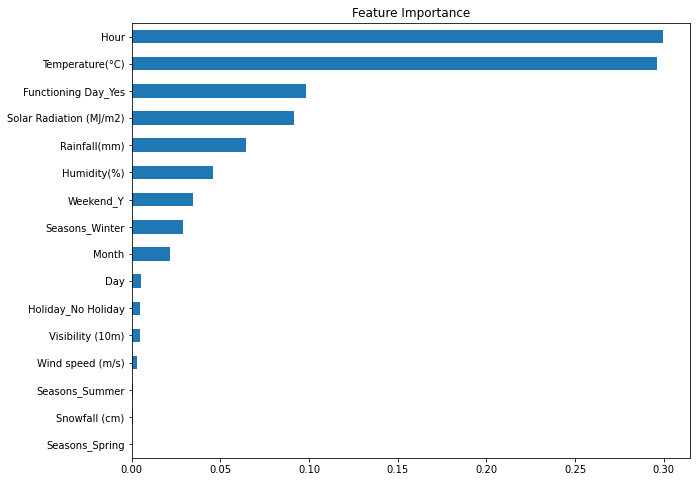

In [127]:
#Visualizing features importance of Decision Tree Regressor model
plotting_imp_features(gridsearch_dtr.best_estimator_, X_train)

## 7. Random Forest Regressor

In [128]:
#importing the Random Forest regressor from ensemble module and GirdSearchCV for tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [129]:
# rfr model
rfr = RandomForestRegressor()

# hyper parameter tuning using gridSearchCV
parameters = {'max_depth': [50, 60, 70],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              'n_estimators':[100, 150, 200]
              }

result = GridSearchCV(rfr, parameters, scoring='r2', cv=5)
result.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [130]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}, n_estimators={}'.format(result.best_params_['max_depth'],
                                    result.best_params_['min_samples_split'], result.best_params_['min_samples_leaf'], result.best_params_['n_estimators']))
# result.best_params_

Best parameters for our model are: max_depth=60, min_samples_split=3, min_samples_leaf=1, n_estimators=200


In [131]:
# train and test performance
train_score = result.best_score_
test_score = result.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.9244897834191905
The best r2 score for test data is 0.9222658422215338


In [132]:
best_rfr = RandomForestRegressor(max_depth=60, min_samples_split=2, min_samples_leaf=1, n_estimators=200)

In [133]:
best_rfr.fit(X_train,y_train)
y_pred=best_rfr.predict(X_test)

In [134]:
#Evaluating the model
print(f'Training score:{best_rfr.score(X_train,y_train)}')
list_of_models.append(evaluate_model('Random Forest Regression(Tuned)',X_test,y_test,y_pred))

Training score:0.9903083212367115
MAE : 102.59968036529679
MSE : 31681.860754908674
RMSE : 177.99399078314042
R2 : 0.9226875898948013
Adjusted R2 :  0.9222138256046124


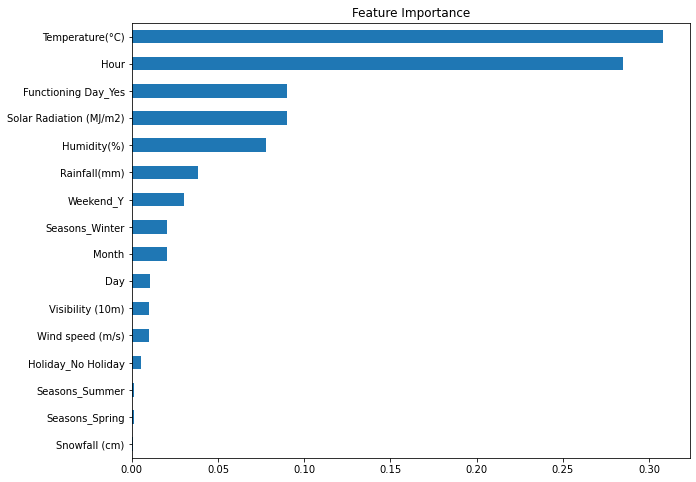

In [135]:
#Visualizing features importance of Random Forest Regressor model
plotting_imp_features(result.best_estimator_, X_train)

## 8. XGBoost Regressor

In [136]:
#importing the required packages and classes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [137]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [138]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

list_of_models.append(evaluate_model('XGBoost Regression(default)',X_test,y_test,predictions))

[09:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 168.22618599456013
MSE: 66671.41259656809
RMSE: 258.2080800373375
R2 Score: 0.8373035083755248
------------------------------
[09:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 361.87913708074166
MAE : 168.22618599456013
MSE : 66671.41259656809
RMSE : 258.20808

Xgboost with Hyperparameter Tuning

In [139]:
xgb_2 = XGBRegressor() 
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.9375103962305379
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [140]:
best_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.03,subsample=0.7,objective='reg:squarederror',max_depth = 7,silent=1,min_child_weight= 4,colsample_bytree= 0.7)
best_xgb.fit(X_train, y_train)
predictions = best_xgb.predict(X_test)
print(f'Training score:{best_xgb.score(X_train,y_train)}')
#Evaluating the model
list_of_models.append(evaluate_model('XGBoost Regression(Tuned)',X_test,y_test,predictions))

Training score:0.9951066432885016
MAE : 86.54242736425483
MSE : 22418.539122401522
RMSE : 149.72821752228776
R2 : 0.9452926296217621
Adjusted R2 :  0.9449573872142355


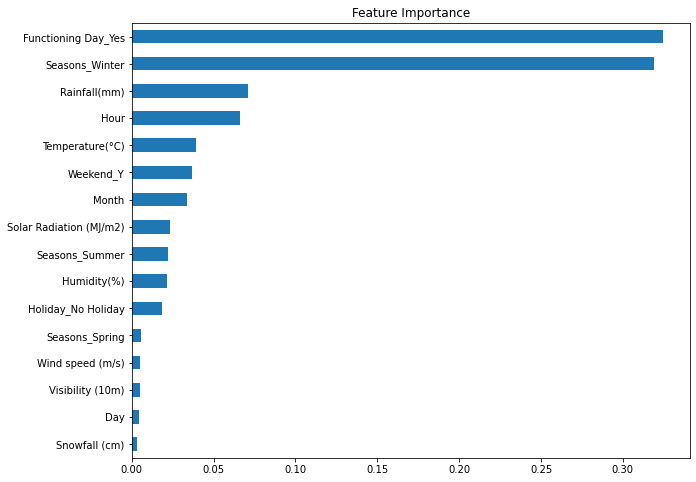

In [141]:
#Visualizing features importance of XGBoost model
plotting_imp_features(best_xgb, X_train)

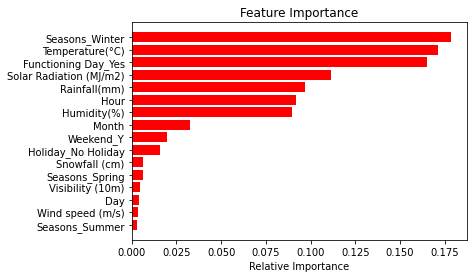

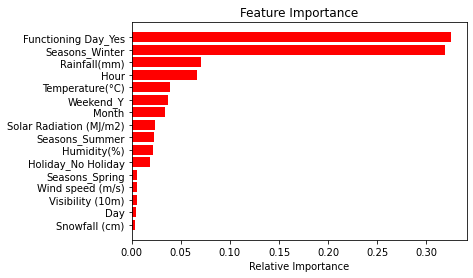

In [142]:
for i in [xgb,best_xgb]:
  features = X_train.columns
  importances = i.feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## 9. CatBoost Regressor

In [143]:
#installing CatBoost package
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [144]:
#Importing the Catboost Regressor class
from catboost import CatBoostRegressor

In [145]:
#Displaying the list of columns in the main data frame
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Days_of_week', 'Day', 'Weekend'],
      dtype='object')

In [146]:
X=bd_df.drop(columns=['Date','Rented Bike Count','Days_of_week'])
y=bd_df['Rented Bike Count']

In [147]:
#List of categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categorical_columns)

#Get location of categorical columns
categorical_features_indices = [X.columns.get_loc(col) for col in categorical_columns]
print("Location of categorical columns : ",categorical_features_indices)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day', 'Weekend']
Location of categorical columns :  [8, 9, 10, 13]


In [148]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Catboost model with default set of parameters

In [149]:
# creating Catboost model
CB_regressor= CatBoostRegressor( loss_function='RMSE')

 # train the model
CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [150]:
#Make predictions and evalution of Catboost model

print(f'Training score:{CB_regressor.score(X_train,y_train)}')

y_pred=CB_regressor.predict(X_test)

#Evaluating the model
list_of_models.append(evaluate_model('Catboost Regression(default)',X_test,y_test,y_pred))

Training score:0.9781454870001953
MAE : 91.88171116314396
MSE : 24268.891333672378
RMSE : 155.78475963223224
R2 : 0.9407772638702517
Adjusted R2 :  0.9404599587398206


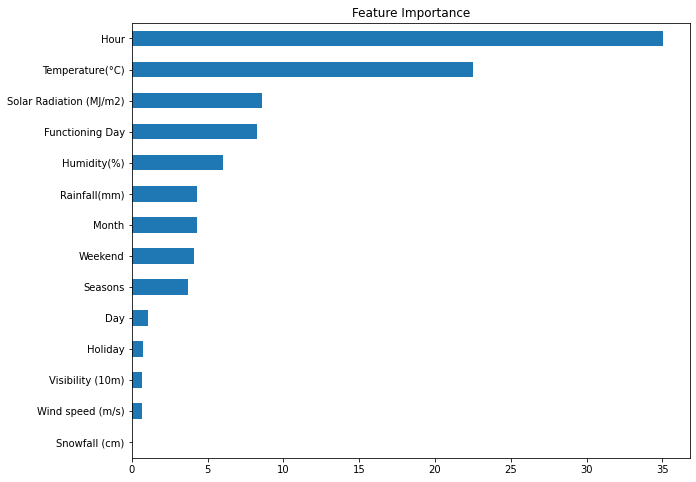

In [151]:
#Visualizing features importance of Catboost model
plotting_imp_features(CB_regressor, X_train)

Catboost model with Hyperparameter tuning

In [152]:
#Finding the optimal parameters by Grid Search Cross Validation

parameters = {'depth' : [8,7,6],'learning_rate' : [0.025, 0.05, 0.1],'iterations':[100,200,500]}
CB_regressor = CatBoostRegressor(iterations=50, loss_function='RMSE',cat_features=categorical_features_indices)
grid = GridSearchCV(estimator=CB_regressor, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 604.5917271	total: 10.2ms	remaining: 5.08s
1:	learn: 564.7596572	total: 18.6ms	remaining: 4.63s
2:	learn: 528.9504853	total: 26.7ms	remaining: 4.42s
3:	learn: 497.6696783	total: 33.7ms	remaining: 4.18s
4:	learn: 470.9545560	total: 40.9ms	remaining: 4.05s
5:	learn: 447.2791664	total: 48ms	remaining: 3.95s
6:	learn: 428.8862243	total: 54.7ms	remaining: 3.85s
7:	learn: 409.5376035	total: 61.6ms	remaining: 3.79s
8:	learn: 390.9951561	total: 68.2ms	remaining: 3.72s
9:	learn: 375.1771692	total: 74.8ms	remaining: 3.66s
10:	learn: 361.2152158	total: 80.9ms	remaining: 3.6s
11:	learn: 348.2132850	total: 88.4ms	remaining: 3.6s
12:	learn: 335.2016748	total: 94.8ms	remaining: 3.55s
13:	learn: 326.2422419	total: 101ms	remaining: 3.5s
14:	learn: 316.9903968	total: 107ms	remaining: 3.47s
15:	learn: 308.2366256	total: 114ms	remaining: 3.44s
16:	learn: 301.8662516	total: 120ms	remaining: 3.42s
17:	learn: 292.9768389	total: 126ms	remaining: 3.39s
18:	learn: 286.8108009	total: 133ms	remaining: 3

In [153]:
# creating Catboost model
best_CB_regressor= CatBoostRegressor(iterations=500,depth=8,learning_rate=0.1, loss_function='RMSE')
 # train the model
best_CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [154]:
#Make predictions and evalution of Catboost model

print(f'Training score:{best_CB_regressor.score(X_train,y_train)}')

y_pred=best_CB_regressor.predict(X_test)

#Evaluating the model
list_of_models.append(evaluate_model('Catboost Regression(tuned)',X_test,y_test,y_pred))

Training score:0.985898943747007
MAE : 86.31565900219194
MSE : 22706.282422074244
RMSE : 150.68603924078118
R2 : 0.9445904572284984
Adjusted R2 :  0.9442935825255513


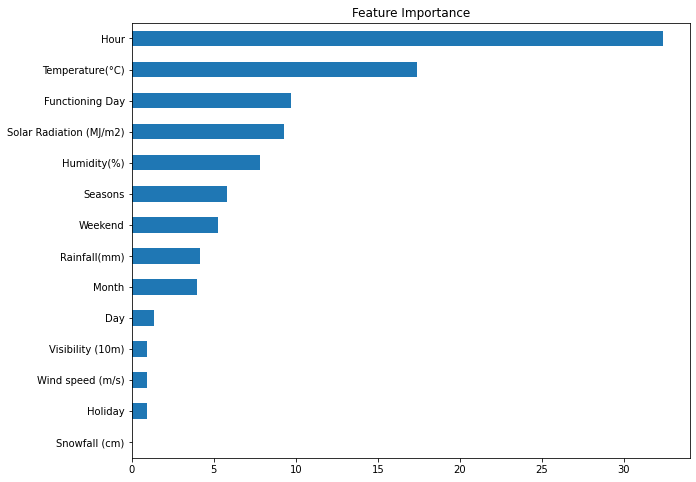

In [155]:
#Visualizing features importance of the best Catboost model
plotting_imp_features(best_CB_regressor, X_train)

In [156]:
#Comparing models
Comparison_df=pd.DataFrame(list_of_models,columns=['Regression Model','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','r2 score','adjusted r2 score'])
Comparison_df

,Regression Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,r2 score,adjusted r2 score
0,Multiple Linear Regression,327.665790,188770.692536,434.477494,0.539348,0.536525
1,Lasso Regression(Tuned),327.578790,188737.802791,434.439642,0.539428,0.536606
2,Ridge Regression (default),327.657172,188767.250135,434.473532,0.539356,0.536533
3,Ridge Regression(Tuned),327.657214,188767.267238,434.473552,0.539356,0.536533
4,Elastic Net Regression(default),332.689114,206068.926029,453.948153,0.497135,0.494054
5,Elastic Net Regression(Tuned),327.559625,188730.345723,434.431060,0.539446,0.536624
6,Random Forest Regression(Tuned),102.599680,31681.860755,177.993991,0.922688,0.922214
7,XGBoost Regression(default),168.226186,66671.412597,258.208080,0.837304,0.836307
8,XGBoost Regression(Tuned),86.542427,22418.539122,149.728218,0.945293,0.944957
9,Catboost Regression(default),91.881711,24268.891334,155.784760,0.940777,0.940460


## Conclusion

Evaluating the performance metrics of the models has brought us to a conclusion that Decison tree based Ensemble models like XGBoost and CatBoost models are the most suitable for Predicting the number of bikes required on an hourly basis.

The important features for prediction are : Hour &Temperature.

Due to the lack of significant linear correlation between the independent variables and the count of Rented bikes,Linear regression and Polynomial regression are not good fit in this scenario.

#References

Towards Data Science

Stack Overflow

Analytics Vidhya

Machine Learning Mastery

Geek for Geeks